# Assignment 1

## Question 1:

import and query webpage

In [1]:
#import the library used to query a website, query the website and return the html
from urllib.request import urlopen

!pip3 install bs4

from bs4 import BeautifulSoup

wiki_prefix = "https://en.wikipedia.org/"
wiki = "https://en.wikipedia.org/wiki/Julia_Roberts_filmography"
page = urlopen(wiki)

soup = BeautifulSoup(page, features="html.parser")

jr_movies_table = soup.find_all("table")[0]

'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#Build df
A = []
B = []
C = []
D = []
movies_links = []

#Iterate through the table, and extract information
for row in jr_movies_table.findAll("tr"):
    cells = row.findAll('td')
    movies = row.findAll('th') #To store second column data
    if len(cells) == 5: #Only extract table body not heading

        A.append(movies[0].find(text=True))
        B.append(int(cells[0].find(text=True)))
        C.append(cells[1].find(text=True))
        D.append(cells[2].find(text=True))

        #Store links for use later on, in Question 2.
        link = movies[0].a
        if not link:
            movies_links.append("")
        for link in movies[0].findAll('a'):
            movies_links.append(wiki_prefix + link.get('href'))

In [5]:
#import pandas to convert list to data frame
import pandas as pd

df = pd.DataFrame(A,columns=['Title'])
df['Year'] = B
df['Role'] = C
df['Director'] = D
df['Links'] = movies_links

df.sort_values("Year")

question_1 = df.copy().drop("Links", axis=1)

In [6]:
question_1

,Title,Year,Role,Director
0,Firehouse,1987,Babs,J. Christian Ingvordsen
1,Satisfaction,1988,Daryle Shane,Joan Freeman
2,Mystic Pizza,1988,Daisy Arujo,Donald Petrie
3,Blood Red,1989,Marisa Collogero,Peter Masterson
4,Steel Magnolias,1989,Shelby Eatenton Latcherie,Herbert Ross
5,Pretty Woman,1990,Vivian Ward,Garry Marshall
6,Flatliners,1990,Rachel Mannus,Joel Schumacher
7,Sleeping with the Enemy,1991,Laura Williams Burney,Joseph Ruben
8,Dying Young,1991,Hilary O'Neil,Joel Schumacher
9,Hook,1991,Tinker Bell,Steven Spielberg


## Question 2

In [7]:
import re

Find all actors, and save their links

In [20]:
actors_list = []
link_list = []

for movie_link in df["Links"]:
    if movie_link == "":
        continue
    page = urlopen(movie_link)
    soup = BeautifulSoup(page, features="html.parser")
    html = list(soup.children)[2]
    body = list(html.children)[3]

    span = soup.findAll("span", id=re.compile("(^Cast$)|(\scast$)"))
    if not span:
        continue

    try:
        p = span[0].parent
        entire_list = list(p.findNext('ul').findAll("li"))
        for entry in entire_list:
            if entry.find('a'):
                name = entry.find('a').get_text()
                if not name == "Julia Roberts":
                    actors_list.append(name)
                    link_list.append(wiki_prefix + entry.find('a').get('href'))

            elif entry.get_text() != "":
                name = entry.get_text()
                if name.find(' as ') > -1:
                    name = name[:name.find(' as ')]
                if not name == "Julia Roberts":
                    actors_list.append(name)
                    link_list.append(None)
    except:
        None


actorsdf = pd.DataFrame(actors_list, columns=['Name'])
actorsdf['Link'] = link_list
duplicated = actorsdf.groupby('Name').size().reset_index(name='Num of occurrences')
actorsdf.drop_duplicates(['Name'], keep="last",inplace=True)
actorsdf.sort_values("Name")

,Name,Link
81,A.J. Johnson,https://en.wikipedia.org//wiki/Adrienne-Joi_Jo...
305,Aaron Eckhart,https://en.wikipedia.org//wiki/Aaron_Eckhart
688,Aaron Yoo,https://en.wikipedia.org//wiki/Aaron_Yoo
655,Aasif Mandvi,https://en.wikipedia.org//wiki/Aasif_Mandvi
58,Abdul Salaam El Razzac,None
625,Abigail Breslin,https://en.wikipedia.org//wiki/Abigail_Breslin
4,Adam Storke,https://en.wikipedia.org//wiki/Adam_Storke
466,Aharon Ipalé,https://en.wikipedia.org//wiki/Aharon_Ipal%C3%A9
104,Ahmad Stoner,None
202,Aidan Quinn,https://en.wikipedia.org//wiki/Aidan_Quinn


The following is a function we will use to extract awards. For a given actor, it opens the relevant link, finds al the tables in that link, and counts how many awards has this actprs been awarded.

In [21]:
def findAwardsFunc(name):
    try:
        ur = "https://en.wikipedia.org/wiki/List_of_awards_and_nominations_received_by_" + name.replace(' ', '_')
        awardPage = urlopen("https://en.wikipedia.org/wiki/List_of_awards_and_nominations_received_by_" + name.replace(' ', '_'))
        awardSoup = BeautifulSoup(awardPage, features="html.parser")
        i = 0;
        findAwards = awardSoup.findAll('table')
        if not findAwards:
            return -1
        else:
            return str(findAwards).count("Won")
    except:
        return -1

For each actor, scrape birth year, birth place nd number of awards

In [22]:
BD=[] #will have the birth year data
BP=[] #will have the birth country data
AW=[] #will have the awards data

tmpNames=actorsdf['Name']
ind = 0
for co_actor_link in actorsdf["Link"]:
    bd_len_before = len(BD)
    bp_len_before = len(BP)
    aw_len_before = len(AW)
    ind = ind + 1
    if co_actor_link == "":
        BD.append(None)
        BP.append(None)
        AW.append(None)
        continue

    try:
        coactorpage = urlopen(co_actor_link)
        soup = BeautifulSoup(coactorpage, features="html.parser")

        #find personal info: birthdate birth country and awards
        findTable = soup.find('table', class_='infobox biography vcard')
        if not findTable:
            BD.append(None)
            BP.append(None)
            AW.append(None)
            continue
        born = findTable.find('span',class_='bday')
        if born:
            bdate = (born.string).split("-")
            BD.append(bdate[0])
        else:
            BD.append(None)
            
        birthplacesoup = findTable.find('div',class_='birthplace')
        if birthplacesoup:
            birthplace = (birthplacesoup.get_text()).split(",")
            BP.append(birthplace[len(birthplace)-1])
        else:
            BP.append(None)
        #this section is dealing with the finding the awards   
        findAwards = soup.findAll("td", style="background: #99FF99; color: black; vertical-align: middle; text-align: center;")
        countAwards = 0
        try:
            if findAwards:
                countAwards = str(findAwards).count("Won")
                countAwards = countAwards + str(findAwards).count("Honoured")
                countAwards = countAwards + str(findAwards).count("Honored")
                
                if countAwards == 0:
                    countAwards = findAwardsFunc(tmpNames[ind]) #use external link to try find the awards
            else:
                countAwards = findAwardsFunc(tmpNames[ind]) #use external link to try find the awards
            if countAwards == -1:
                AW.append(None)
            else:
                AW.append(countAwards)
        except:
            AW.append(None)
    except:
        None

    if bd_len_before == len(BD):
        BD.append(None)

    if bp_len_before == len(BP):
        BP.append(None)

    if aw_len_before == len(AW):
        AW.append(None)

construct the data frame

In [23]:
actorsdf['Birth year'] = BD
actorsdf['Birth palce'] = BP
actorsdf['Awards'] = AW

In [24]:
question_2 = actorsdf.copy().drop("Link", axis=1)
question_2

,Name,Birth year,Birth palce,Awards
0,Annabeth Gish,1971,United States,NaN
3,William R. Moses,1959,U.S.,NaN
4,Adam Storke,1962,U.S.,NaN
6,Joanna Merlin,1931,U.S.,2.0
7,Porscha Radcliffe,None,None,NaN
8,Louis Turenne,1933,Canada,NaN
9,Janet Zarish,None,U.S.,NaN
10,Arthur Walsh,None,None,NaN
11,John Cunningham,None,None,NaN
12,Ann Flood,1934,None,NaN


## Question 3

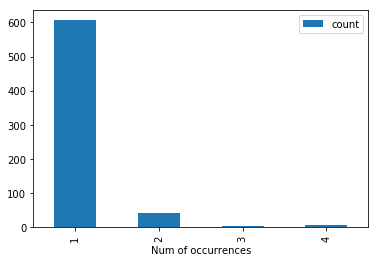

In [25]:
import matplotlib.pyplot as plt

dfHistogram = duplicated.groupby('Num of occurrences').size().reset_index(name ='count')
dfHistogram.plot(x='Num of occurrences', y='count', kind='bar')
plt.show()

(Please find picture attached at plot.png)